# Network Data Science with NetworkX and Python

## Create and visualize sub-graphs
This code is creating a network visualization and performing some analysis on a social network dataset. Here are the steps in the code:

Import necessary libraries: defaultdict, matplotlib.pyplot, sample from random, networkx, pandas, and numpy.

Define a link to the social network dataset on Github, which is an Excel file containing two sheets: "Elements" and "Connections".

Load the "Elements" and "Connections" sheets into elements_data and connections_data variables, respectively.

Define a list of edge attributes as edge_cols that include the edge type, weight, and when it was established.

Convert the edge list in connections_data into a networkx graph using the nx.convert_matrix.from_pandas_edgelist() method. This method takes the source and target columns to specify the nodes involved in each edge and edge_attr to specify the edge attributes.

Convert the elements_data dataframe into a dictionary with the node labels as keys and node attributes as values.

Set the node attributes using nx.set_node_attributes() method on the graph created in step 5.

Draw the graph using nx.draw() with default node size and green edge color.

Get the number of nodes and edges in the graph.

Sample a node randomly from the graph and retrieve its attributes.

Draw a subgraph of 700 randomly sampled nodes using nx.draw() and graph.subgraph() method.

Extract a dictionary of nodes in each school using nx.get_node_attributes() and defaultdict from collections.

Loop over the schools and create subgraphs for each school using graph.subgraph().

Draw a subgraph of nodes in school ID 3 using nx.draw() and subgraphs[3] subgraph.

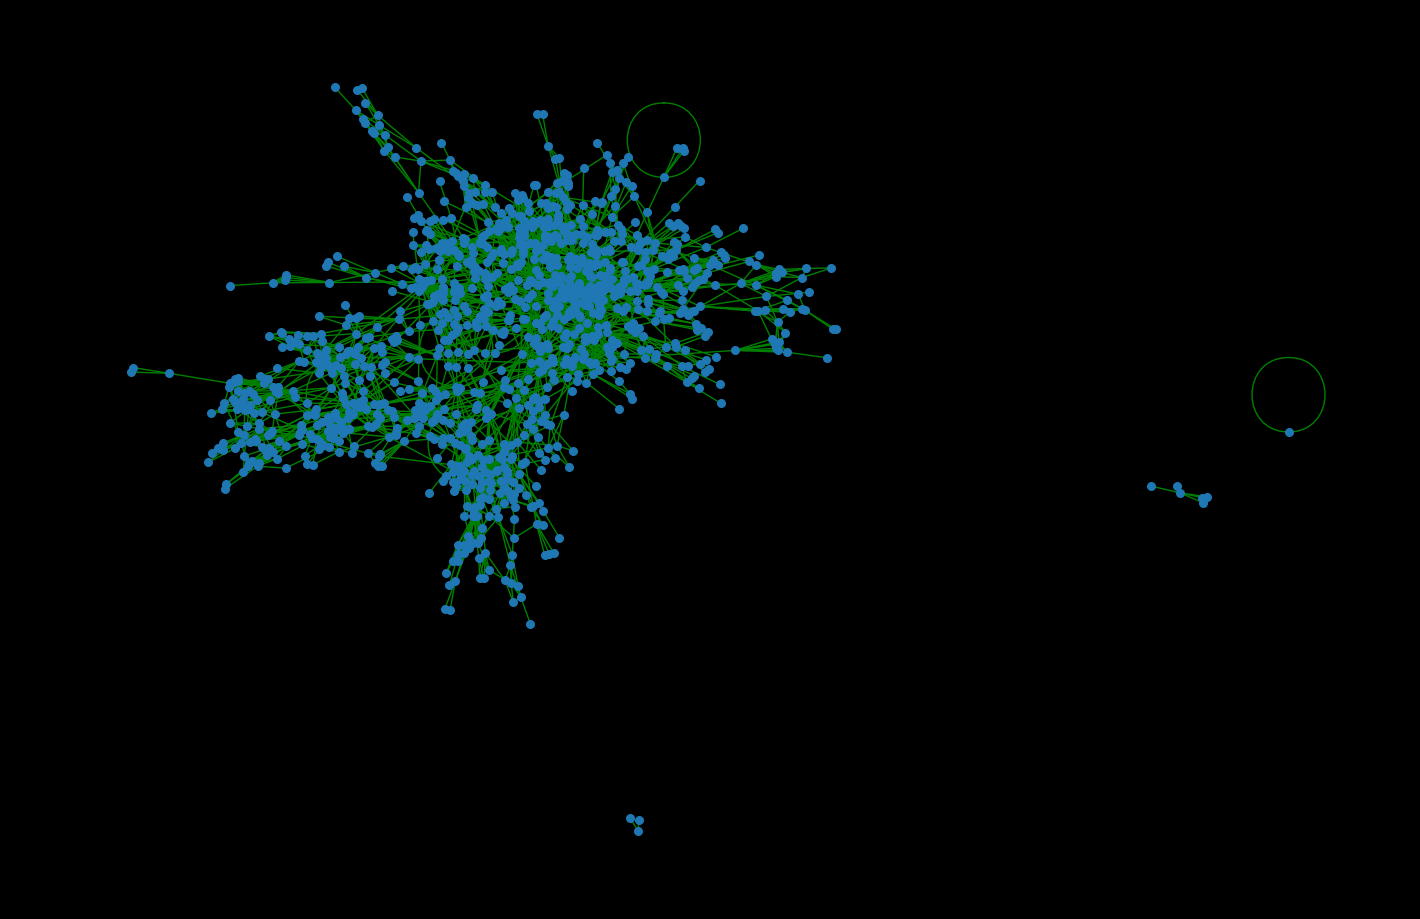

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
from random import sample
import networkx as nx
import pandas as pd
import numpy as np

link = 'https://github.com/vanshika230/Facebook-Network-Analysis/blob/main/Social%20Network%20Dataset.xlsx?raw=true'

network_data = pd.read_excel(link, sheet_name = ['Elements', 'Connections'])
elements_data = network_data['Elements'] # node list
connections_data = network_data['Connections'] # edge list
edge_cols = ['Type', 'Weight', 'When']
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source = 'From',
                                               target = 'To',
                                               edge_attr = edge_cols)

node_dict = elements_data.set_index('Label').to_dict(orient = 'index')
nx.set_node_attributes(graph, node_dict)

fig = plt.figure(figsize = (14, 9))
nx.draw(graph, 
        node_size = 30,
        edge_color = 'g')
fig.set_facecolor('k')

In [3]:
len(graph.nodes)

1193

In [4]:
len(graph.edges)

2947

In [5]:
node = sample(graph.nodes, 1)[0]
graph.nodes[node]

{'Type': 'Student', 'School (ID)': 4, 'Answered the form': 'Yes'}

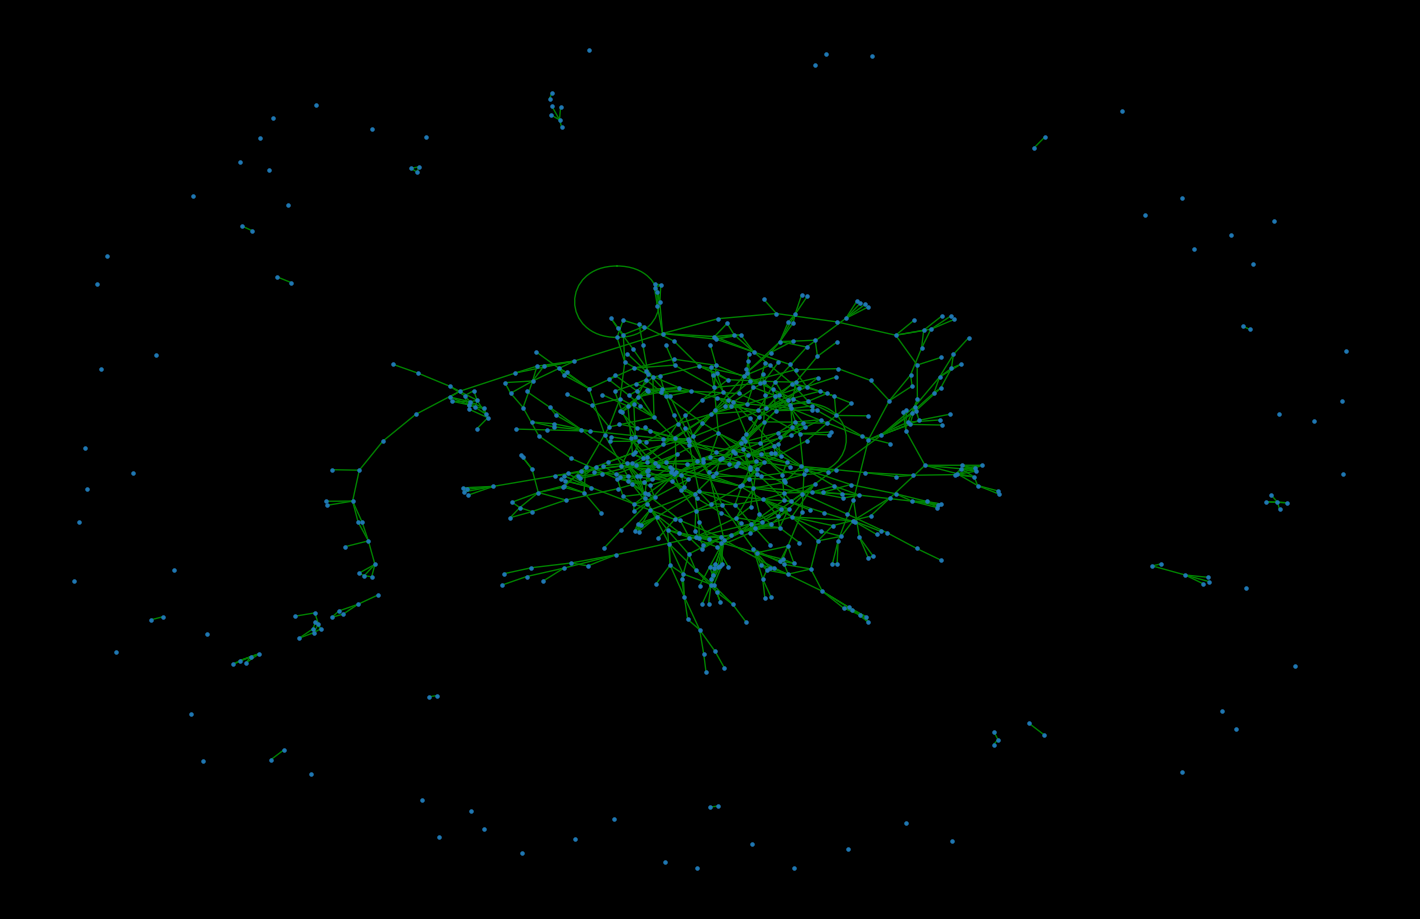

In [6]:
fig = plt.figure(figsize = (14, 9))

sampled_nodes = sample(graph.nodes, 700)
subgraph = graph.subgraph(sampled_nodes)
nx.draw(subgraph,
        node_size = 5,
        with_labels = False,
        edge_color = 'g')

fig.set_facecolor('k')

In [7]:
nodes_school_id = nx.get_node_attributes(graph,
                                         'School (ID)')
school_nodes = defaultdict(list)
for node, school_id in nodes_school_id.items():
    school_nodes[school_id].append(node)

In [8]:
school_nodes[5]

['S-82d78a', 'S-087f53']

In [9]:
graph.nodes['S-087f53']

{'Type': 'Student', 'School (ID)': 5, 'Answered the form': 'No'}

In [10]:
subgraphs = {}
for school_id, nodes in school_nodes.items():
    subgraph = graph.subgraph(nodes)
    subgraphs[school_id] = subgraph

In [11]:
subgraphs[5].nodes

NodeView(('S-087f53', 'S-82d78a'))

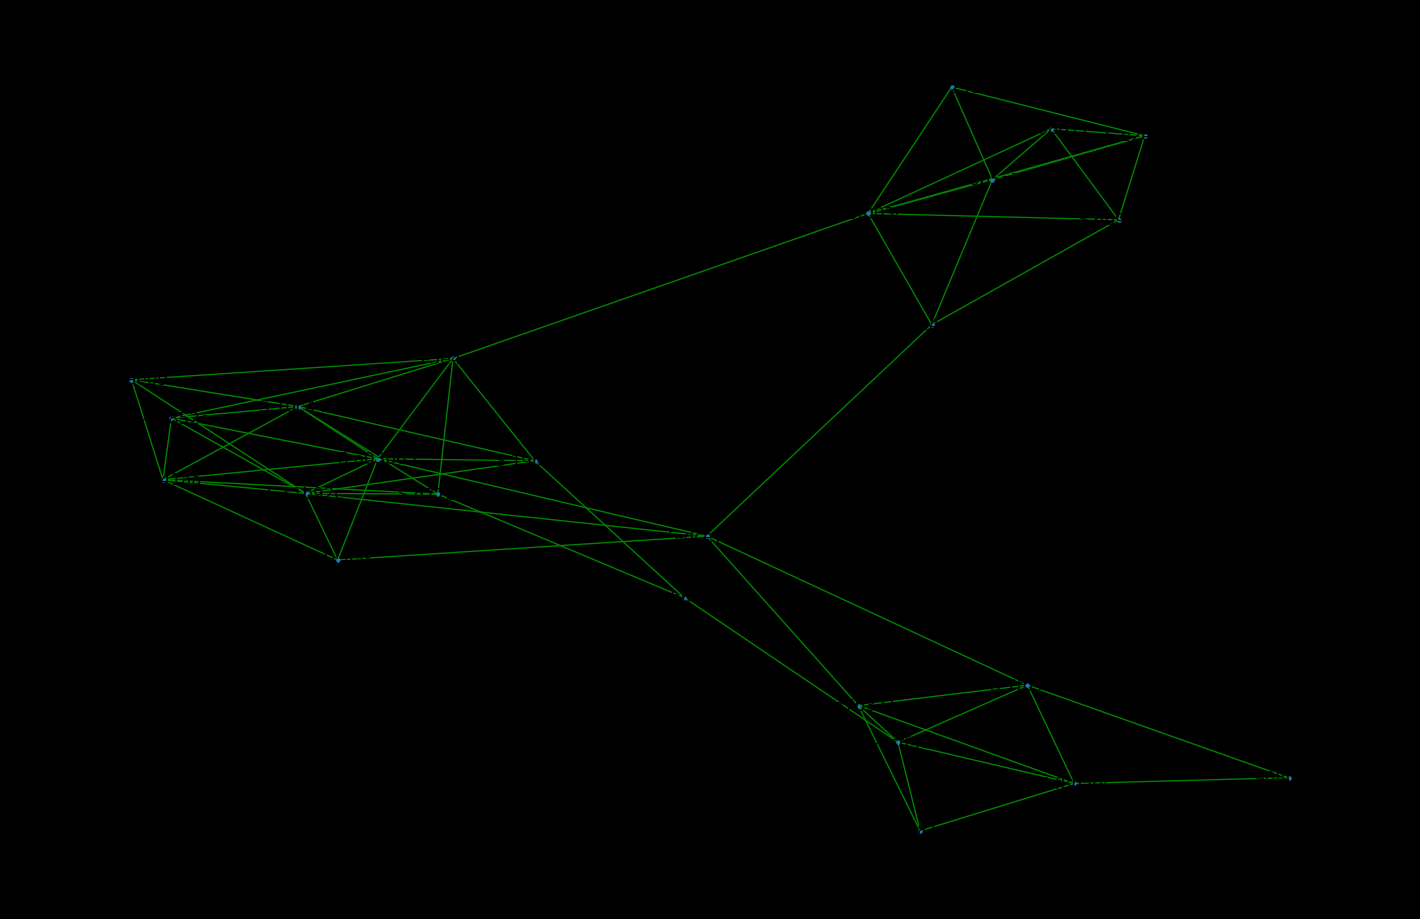

In [12]:
fig = plt.figure(figsize = (14, 9))

nx.draw(subgraphs[3],
        node_size=5,
        with_labels=True,
        edge_color = 'g')

fig.set_facecolor('k')